In [1]:
path= 'C:/covid2020/'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
dfChiapas=pd.read_csv(path + "Enfermedades.csv",low_memory=False)

In [4]:
dfChiapas.head()

,Enfermedades,No,Si,No_Especificado
0,NEUMONIA,256633,8465,472
1,DIABETES,245327,20049,194
2,EPOC,263822,1568,1568
3,ASMA,260117,5284,169
4,INMUSUPR,263744,1634,192


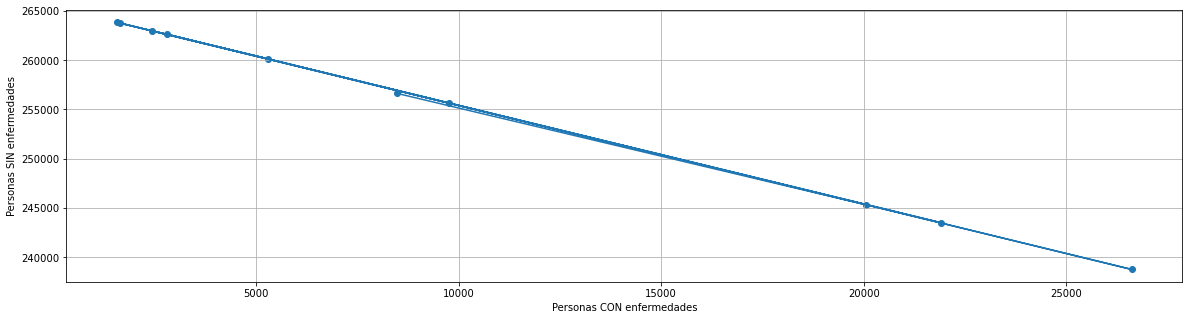

In [14]:
fig = plt.figure(figsize=(20,5))
plt.scatter(dfChiapas['Si'],dfChiapas['No'])
plt.plot(dfChiapas['Si'],dfChiapas['No'])
plt.xlabel('Personas CON enfermedades')
plt.ylabel('Personas SIN enfermedades')
plt.grid()

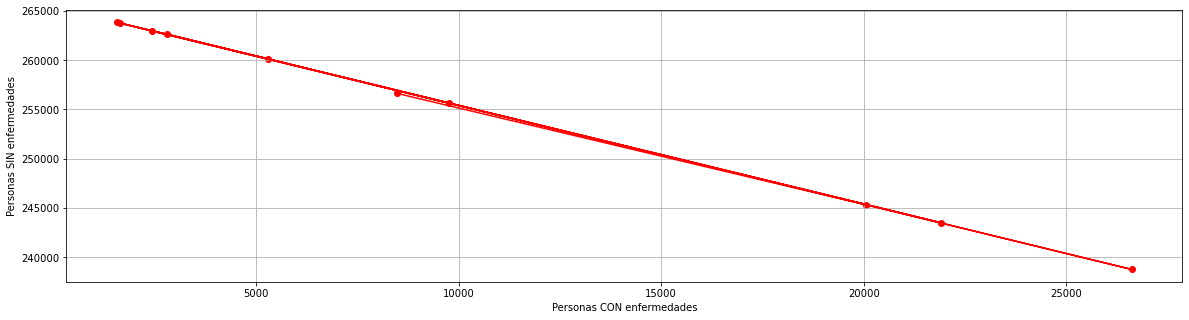

In [32]:
fig = plt.figure(figsize=(20,5))
plt.scatter(dfChiapas['Si'],dfChiapas['No'], color="red")
plt.plot(dfChiapas['Si'],dfChiapas['No'],color='red')
#color
plt.xlabel('Personas CON enfermedades')
plt.ylabel('Personas SIN enfermedades')
plt.grid()

In [15]:
dfChiapas.keys()

Index(['Enfermedades', 'No', 'Si', 'No_Especificado'], dtype='object')

In [16]:
nImages = dfChiapas['Si'].values.reshape(-1,1)
Cambio = dfChiapas['No'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(nImages, Cambio)
Cam_pred = linear_regressor.predict(nImages)
Cam_pred

array([[256899.33448066],
       [245320.19905411],
       [263793.43816133],
       [260078.99865468],
       [263727.46587731],
       [238756.95637363],
       [262939.79678925],
       [243471.97552134],
       [262559.95636607],
       [255603.87872161]])

In [33]:
#y=mx+c
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
label = r'$Margen = %0.4f %+0.4f$'%(m,c)
print(label)

$Margen = -0.9996 +265360.7797$


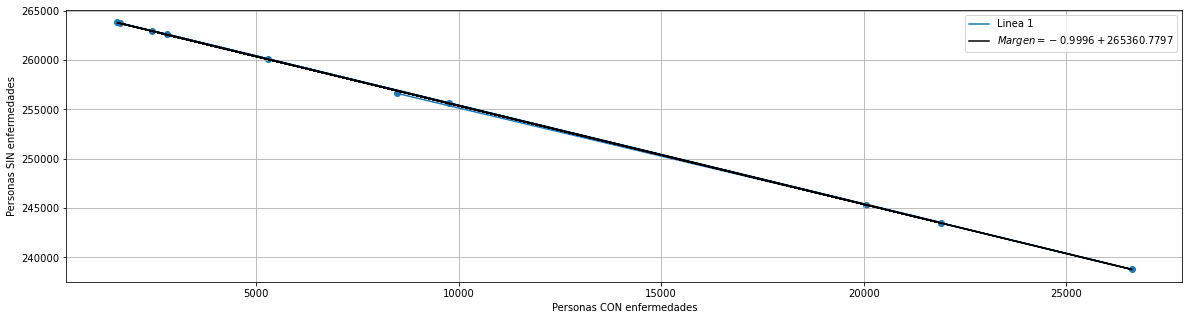

In [41]:
fig = plt.figure(figsize=(20,5))
plt.scatter(dfChiapas['Si'],dfChiapas['No'])
plt.plot(dfChiapas['Si'],dfChiapas['No'], label='Linea 1')
plt.plot(nImages, Cam_pred, color='black', label=label)
plt.xlabel('Personas CON enfermedades')
plt.ylabel('Personas SIN enfermedades')
plt.legend()
plt.grid()